<a href="https://www.kaggle.com/code/danielebaldoni/my-approach-to-a-tabular-regression-problem?scriptVersionId=93382284" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


# Our job will be structured in this way:

1) First of all let's read the datasets of training and test and visualize it to have in a glance the first idea of what our datasets consists in.

2) Make some data cleaning searching if we have outliers and missing values and than make some feature engineering if we found something strange.

3) Using some visualizations to search some further insight that we couldn't see before just reading the data.

4) Preparing the data for the model with scaling or normalization and splitting it in train and validation set

5) Apply some regression beginnning from simple linear regression understanding the general interpretability of the model and using after that some regularizations

6) Try other kind of models different from linear Regression and choose which one could be the best to get a better interpretation of the data for this case


READ THE DATA
---

In [2]:
train=pd.read_csv("../input/tabular-playground-series-jan-2021/train.csv")

In [3]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
test=pd.read_csv("../input/tabular-playground-series-jan-2021/test.csv")

I want to see the general information of both train and test data
---

In [5]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [6]:
test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,250261.031215,0.507222,0.498080,0.521381,0.514801,0.502274,0.526987,0.487722,0.525284,0.460257,0.520478,0.484187,0.506763,0.554390,0.503174
std,144128.894365,0.204220,0.227866,0.200656,0.232995,0.220812,0.218145,0.180805,0.216084,0.197217,0.201645,0.219972,0.218598,0.229730,0.208333
min,0.000000,-0.061638,-0.030548,0.040867,0.153318,0.276679,0.075104,-0.024760,0.219631,-0.231308,-0.109759,0.078859,0.094504,0.015367,0.164500
25%,125538.250000,0.343649,0.322703,0.344251,0.294361,0.284113,0.356357,0.347336,0.342148,0.330739,0.375496,0.301236,0.310875,0.350956,0.308210
50%,250389.500000,0.484292,0.553147,0.551413,0.482019,0.451960,0.471000,0.466392,0.483781,0.416900,0.458622,0.442037,0.485527,0.491538,0.431124
75%,375240.250000,0.644079,0.686518,0.648656,0.747133,0.670831,0.694422,0.580666,0.685070,0.575248,0.700157,0.677691,0.694630,0.769323,0.712664
max,499990.000000,1.017577,0.853813,1.001791,0.997446,1.033722,1.046715,1.054225,1.026280,1.001405,1.140639,1.023151,1.049417,0.977223,0.868679


In [7]:

#We can see in the previous table that the distributions of the variables for training and testing set are quite similar
a=train.describe()
b=test.describe()
a-b

,cont1,cont10,cont11,cont12,cont13,cont14,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,id,target
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,NaN
mean,-0.000349,0.000055,-0.000261,0.000113,-9.482839e-04,0.000539,-0.000182,0.000176,0.000882,-0.000252,-0.000471,0.000168,-0.000121,-0.000399,-435.885358,NaN
std,-0.000244,0.000209,0.000111,0.000350,5.860212e-07,-0.000095,0.000294,0.000114,0.000040,-0.000111,-0.000236,0.000291,0.000138,-0.000533,347.838197,NaN
min,-0.020625,0.024713,0.004418,-0.005869,1.458336e-02,0.001868,-0.000849,-0.019900,-0.000557,-0.000303,-0.008939,-0.072906,-0.002371,-0.009297,1.000000,NaN
25%,-0.000571,-0.000032,-0.000763,-0.000709,-4.845115e-04,0.000463,-0.003533,-0.000155,0.000574,-0.000005,-0.000194,-0.000736,-0.000661,0.000093,-881.750000,NaN
50%,-0.000286,0.000255,-0.000121,0.001072,-3.830782e-03,0.000721,0.000063,0.000058,0.000861,-0.000228,-0.000012,0.000433,-0.000321,-0.000057,-651.000000,NaN
75%,-0.000290,0.000134,0.001437,-0.000177,-8.438089e-04,-0.000011,0.044745,-0.000341,0.001573,-0.000171,-0.000379,0.000626,0.000180,-0.000207,-404.000000,NaN
max,-0.001349,0.059312,-0.000531,-0.000391,6.219733e-04,-0.000173,0.005884,0.005163,0.012957,0.000538,-0.002857,0.011942,-0.001853,0.002709,9.000000,NaN


It was just to have a glance and verify that the distributions of our features are quite similar for the 2 datasets

In [8]:
train.shape,test.shape

((300000, 16), (200000, 15))

Our datasets are composed of 30k records for the train that we will use to train our final model and 20k records withouth the target variable for the test dataset. Our task for this competition is just to predict the value for the target variable.
That's why the number of column is different. The only differene is in the variable to predict.

EXOLORATORY DATA ANALYSIS
===

we have different ooerations to do before to start:

- check the missing values
- find the outliers
- study the correlations and drop unuseful variables
- some visualizations
- make some transformations if needed like changing.



Check of the missing Values
---
We have no missing values for both the datasets. 
The cell below show the code to visualize the number of null values in the different columns of the 2 datasets.

We have no missing values for both the datasets

In [9]:
train.isnull().sum(),test.isnull().sum()

(id        0
 cont1     0
 cont2     0
 cont3     0
 cont4     0
 cont5     0
 cont6     0
 cont7     0
 cont8     0
 cont9     0
 cont10    0
 cont11    0
 cont12    0
 cont13    0
 cont14    0
 target    0
 dtype: int64,
 id        0
 cont1     0
 cont2     0
 cont3     0
 cont4     0
 cont5     0
 cont6     0
 cont7     0
 cont8     0
 cont9     0
 cont10    0
 cont11    0
 cont12    0
 cont13    0
 cont14    0
 dtype: int64)

A first blick to the target variable
---

Let's see the distribution of the target variable. As we can imagine the nature is numeric continuous and the distribution seems to be bell shaped. We can see the distribution in form of histograms.
While this variable is not continuous the histogram could be misleading aniway.

<AxesSubplot:>

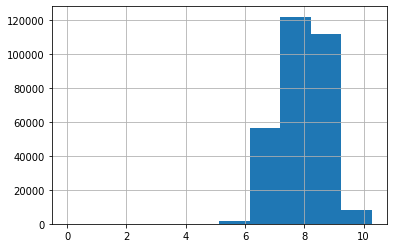

In [10]:
train.target.hist()

If we increase the number of bins we can realize that we have a bimodal distribution and it's not really well shaped. 
We could use some specific test to evaluate the normality of the variable and i'll leave some code later about  how to verify it.

<AxesSubplot:>

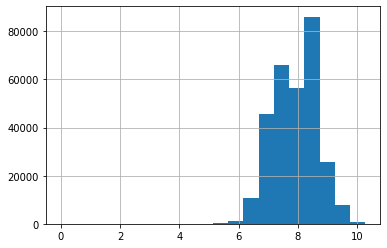

In [11]:
train.target.hist(bins =20)

With the nest command we can have a better idea using the distplot of which is the real shape of the distribution.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

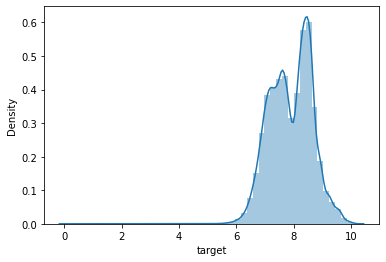

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train.target)

Check the normality of the curve
---
We want to see if the target variable is normally distributed and we can find inspiratio from this link triyng some useful tests of normality:
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [13]:
from scipy import stats
a=train.target
a=np.array(a)
k2,p=stats.normaltest(a)

In [14]:
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [15]:
from scipy.stats import shapiro
stat,p=shapiro(a)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.000
Sample does not look Gaussian (reject H0)


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


OUTLIERS
---

To detect the outliers the best strategy is using the boxplots

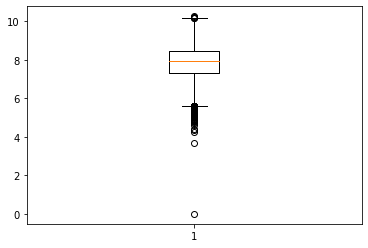

In [16]:
plt.boxplot(train.target)
plt.show()

We didn't see before some ourliers in the distribution. There is a suspicious value of 0 for the target value that is probably an outlier. Let's check it out below the sorted extreme values.

In [17]:
train.target.sort_values()

170514     0.000000
213614     3.700459
184298     4.256207
180587     4.346322
144979     4.417209
            ...    
103920    10.182292
87868     10.186179
285021    10.227541
113457    10.240003
263450    10.267569
Name: target, Length: 300000, dtype: float64

Now we can search the outliers in the ther variable.
With the block of code below we can simoultaneuosly control it for both the datasets and all the feature except the target variable.

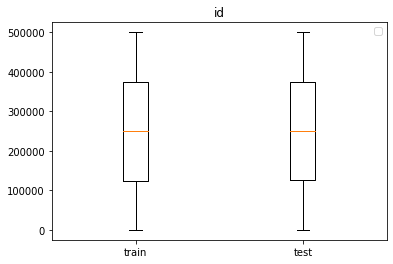

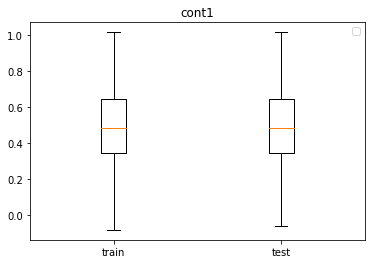

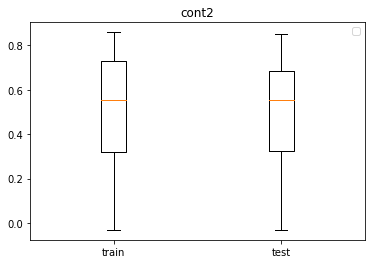

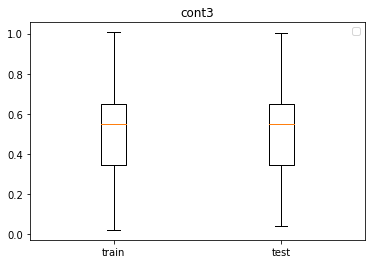

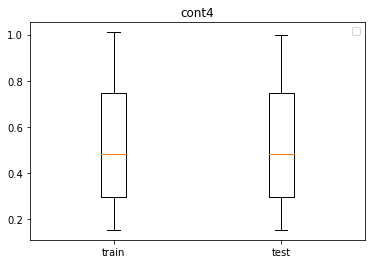

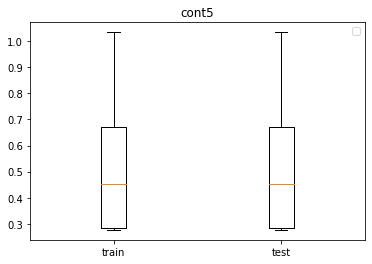

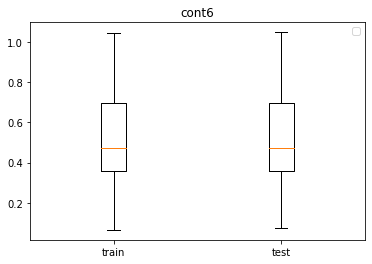

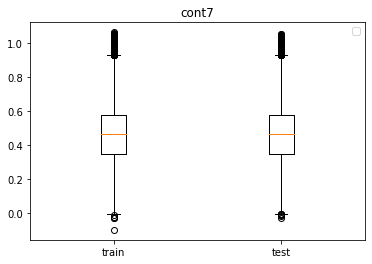

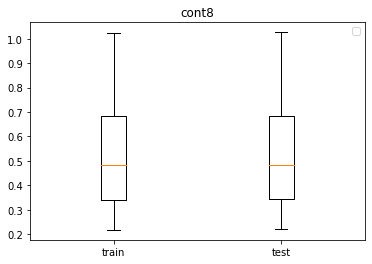

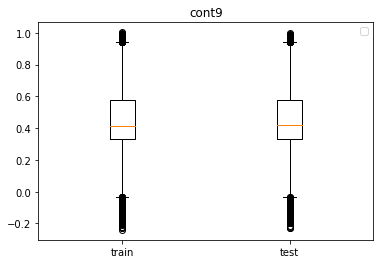

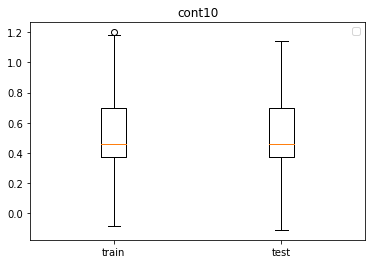

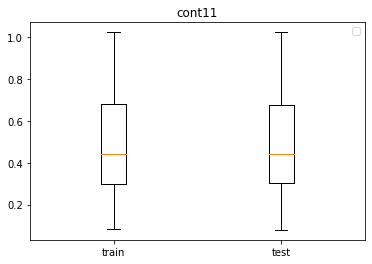

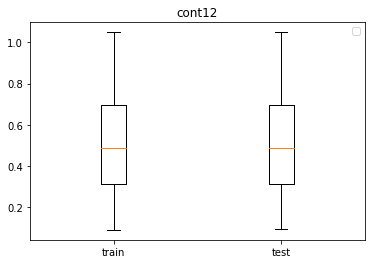

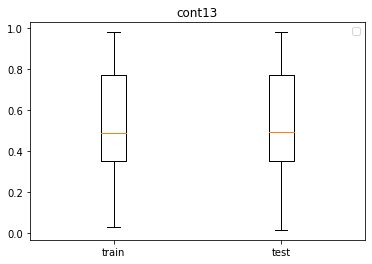

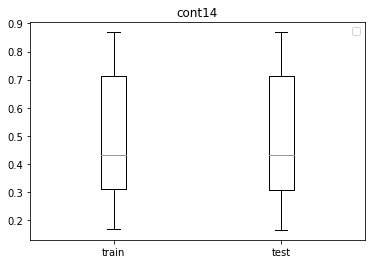

In [18]:
for col in train.columns[:-1]:
    plt.boxplot([train[col],test[col]], labels=['train', 'test'])
    plt.title(col)
    plt.legend()
    plt.show()

Multivariate analysis of the dataset
---
Let's start from t the correlations between the features.
We will check it by correlation matrix and heatmap for the train dataset.
We could visualize it with a simply line of comman (train.corr()) but if we want a more intuitive version of the correlation matrix we can add some detail about the style.

In [19]:
corr=train.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,1.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
cont1,-0.00,1.00,-0.08,-0.42,0.27,-0.06,0.70,0.34,0.37,0.79,0.73,0.57,0.60,0.57,0.07,-0.03
cont2,0.00,-0.08,1.00,0.33,-0.01,0.15,0.02,0.12,0.08,-0.05,0.04,0.13,0.09,0.02,0.02,0.07
cont3,0.00,-0.42,0.33,1.00,-0.33,0.06,-0.30,0.11,-0.31,-0.41,-0.29,-0.08,-0.10,-0.39,-0.07,0.06
cont4,0.00,0.27,-0.01,-0.33,1.00,0.12,0.15,-0.08,0.32,0.26,0.20,0.06,0.07,0.16,0.05,0.01
cont5,0.00,-0.06,0.15,0.06,0.12,1.00,-0.18,-0.24,0.01,-0.07,-0.10,-0.22,-0.19,-0.14,0.04,-0.01
cont6,-0.00,0.70,0.02,-0.30,0.15,-0.18,1.00,0.54,0.42,0.72,0.77,0.74,0.76,0.78,0.07,0.03
cont7,-0.00,0.34,0.12,0.11,-0.08,-0.24,0.54,1.00,0.15,0.34,0.47,0.67,0.66,0.32,-0.04,0.07
cont8,0.00,0.37,0.08,-0.31,0.32,0.01,0.42,0.15,1.00,0.43,0.36,0.30,0.32,0.48,0.10,0.01
cont9,0.00,0.79,-0.05,-0.41,0.26,-0.07,0.72,0.34,0.43,1.00,0.73,0.58,0.61,0.63,0.08,-0.01


The first thing to look is the last row of the table. WE can observe any particularly strong correlation between thetarget variable and the other while we can observe many high correlations between the other continuous variable that can lead to a problem of multicollinearity in the data.
In the next cell we execute the command to highlights the correlations with the use of the heatmap

<AxesSubplot:>

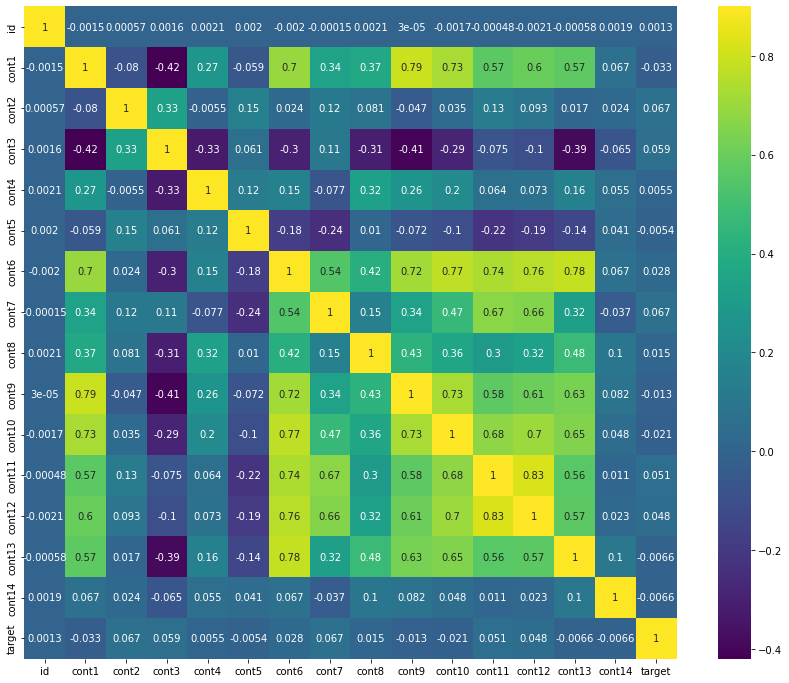

In [20]:
plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(),vmax=0.9,cmap="viridis",annot=True, square =True)

This table show what we note before about the lack of strong correlation between target variable and the predictors

In [21]:
train.corr()[15:16].T

,target
id,0.001347
cont1,-0.032994
cont2,0.067102
cont3,0.058936
cont4,0.005522
cont5,-0.005358
cont6,0.027955
cont7,0.067234
cont8,0.014698
cont9,-0.013029


In [22]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

X=train.drop(["id","target"],axis=1)
y=train.target

I can drop the variable id that is not particularly significant in this case

In [23]:
train=train.drop("id",axis =1)

Some visualizations about the single variables
---

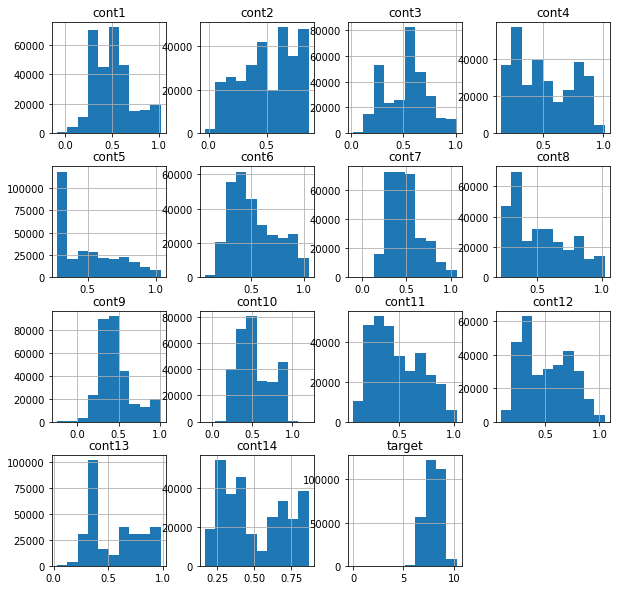

In [24]:
%matplotlib inline
train.hist(bins=10,figsize=(10,10))
plt.show()

In [25]:
train.skew()

cont1     0.529578
cont2    -0.248080
cont3     0.009037
cont4     0.250383
cont5     0.610304
cont6     0.537976
cont7     0.703412
cont8     0.569728
cont9     0.796233
cont10    0.362601
cont11    0.419389
cont12    0.283174
cont13    0.320349
cont14    0.252548
target   -0.077399
dtype: float64

Many variables has problem of skewness. We could make some transformation as well to solve this problem if we find it necessary. In the previous cell of describe method we didn't find particularly problem about the different magnitude of the features so we should scale the data but in this case the situations shouldn't change too much. 

Pairplot
---

In [26]:
#sns.pairplot(train)

Splitting the dataset for the validation
---

In [27]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error

In [28]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=42)

The mean for the 2 splitted vector of y are similar

In [29]:
y_train.mean(),y_val.mean()

(7.904672248762235, 7.9079691806109444)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

Creating a function to evaluate the cross-validation score

In [31]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [32]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [33]:
def linearRegressionSummary(model, column_names):
    '''Show a summary of the trained linear regression model'''

    # Plot the coeffients as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle('Linear Regression Coefficients', fontsize=16)
    rects = plt.barh(column_names, model.coef_,color="lightblue")

    # Annotate the bars with the coefficient values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(0, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left' if width<0 else 'right', va='bottom')        
    plt.show()

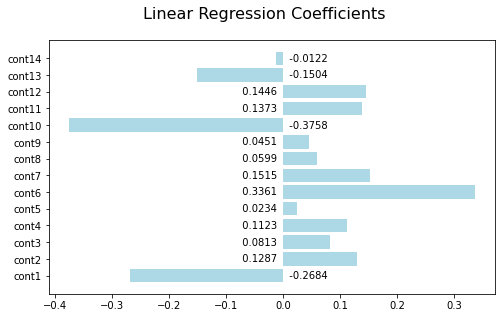

In [34]:
linearRegressionSummary(lr_model,X.columns)

In [35]:
print(rmsle_cv(lr_model))
score=rmsle_cv(lr_model)
print("\nmodel score: {:.4f} {:.4f}\n".format(score.mean(),score.std()))

[0.72509699 0.72771293 0.7283051  0.72287429 0.73152325]

model score: 0.7271 0.0029



In [36]:
pred=lr_model.predict(X_val)

In [37]:
res_df = pd.DataFrame({
    'Actual': y_val, 
    'Predicted':pred
})

res_df


,Actual,Predicted
4941,8.950763,7.833528
51775,7.395528,7.947829
115253,7.856768,7.966417
299321,7.995399,7.954487
173570,8.303734,7.902464
...,...,...
255501,7.751680,7.950522
146711,8.320233,8.075544
254979,8.860155,7.859071
250029,7.366644,7.746280


We can have another view of our predictions with this cell of command

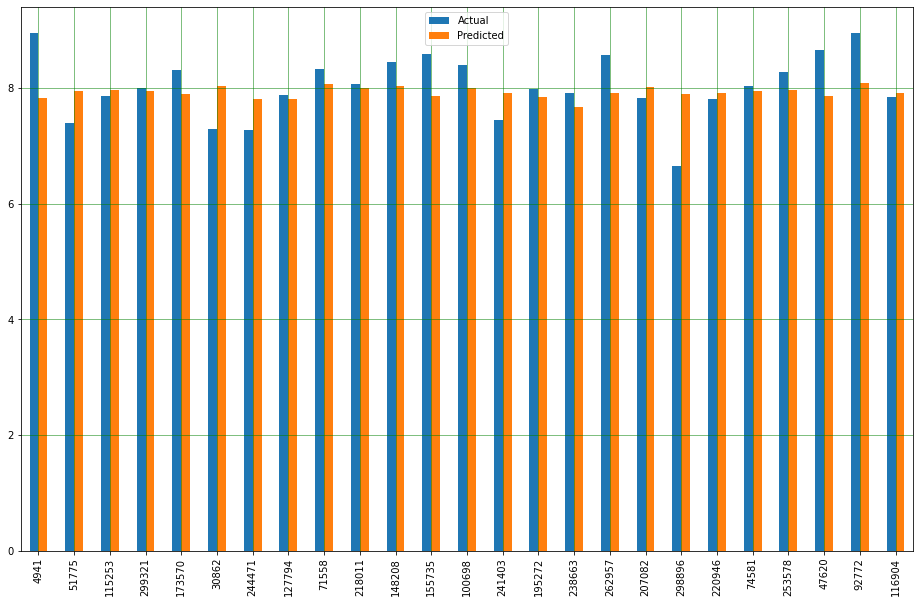

In [38]:
df1 = res_df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [39]:
id=test.id
test=test.drop("id",axis=1)
test.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [40]:
lr_model=LinearRegression()
lr_model.fit(X,y)
predictions=lr_model.predict(test)


In [41]:
predictions

array([8.05374117, 7.597344  , 7.95088747, ..., 7.85591025, 7.93746754,
       7.9558112 ])

In [42]:
print(lr_model.intercept_)
lr_model.coef_

7.717064813141483


array([-0.26801927,  0.13518656,  0.07260511,  0.10767227,  0.02063356,
        0.33849744,  0.15455708,  0.05324184,  0.04997986, -0.38969917,
        0.12132153,  0.15205167, -0.14200015, -0.0109773 ])

In [43]:
output=pd.DataFrame({"id":id,"target":predictions})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [44]:
output

,id,target
0,0,8.053741
1,2,7.597344
2,6,7.950887
3,7,7.942169
4,10,8.060841
...,...,...
199995,499984,7.939253
199996,499985,7.975391
199997,499987,7.855910
199998,499988,7.937468


1st little improving: Introducing scaling
---

In [45]:
#Let's try to use scaling on the same model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler


In [46]:
rs = MinMaxScaler()
rs.fit(X_train)
X_train_rs = pd.DataFrame(rs.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_rs = pd.DataFrame(rs.transform(X_val), columns=X_val.columns, index=X_val.index)
X_rs=pd.DataFrame(rs.transform(X), columns=X_val.columns, index=X.index)

X_train.shape, X_train_rs.shape, X_val.shape, X_val_rs.shape,X_rs.shape

((210000, 14), (210000, 14), (90000, 14), (90000, 14), (300000, 14))

In [47]:
X_train_rs

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
186295,0.580258,0.224357,0.229040,0.395268,0.264394,0.498127,0.527004,0.289649,0.561799,0.356539,0.627807,0.381477,0.411489,0.145046
127847,0.559202,0.351147,0.494833,0.432970,0.006720,0.270173,0.490666,0.082153,0.483440,0.437896,0.053475,0.240312,0.332457,0.908654
274740,0.414150,0.131678,0.441028,0.803411,0.154702,0.194394,0.434670,0.093387,0.468846,0.220534,0.125837,0.174965,0.303812,0.124599
74908,0.525335,0.797702,0.205802,0.902782,0.166513,0.296252,0.368727,0.455440,0.479818,0.327223,0.343390,0.240234,0.265287,0.198764
11630,0.379097,0.511062,0.622665,0.295355,0.636807,0.119240,0.417596,0.057008,0.455416,0.333692,0.146416,0.129769,0.301494,0.203656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.623264,0.865623,0.346096,0.563396,0.850354,0.898965,0.822997,0.765873,0.661417,0.647092,0.934760,0.679718,0.776868,0.746364
259178,0.391499,0.655876,0.537840,0.192553,0.006357,0.287143,0.515302,0.160184,0.311079,0.363179,0.332306,0.301753,0.643758,0.624196
131932,0.367927,0.862612,0.881348,0.143947,0.008608,0.335730,0.552555,0.292219,0.365649,0.443271,0.766617,0.477670,0.263756,0.937966
146867,0.636703,0.946080,0.293831,0.542112,0.316380,0.915873,0.944128,0.812266,0.662691,0.719817,0.774500,0.578594,0.923572,0.178835


In [48]:
X_train

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
186295,0.555144,0.168712,0.246798,0.492490,0.476823,0.553180,0.509706,0.450834,0.453712,0.385270,0.673003,0.453624,0.419998,0.268210
127847,0.532015,0.281664,0.508866,0.524780,0.281559,0.330312,0.467827,0.283509,0.356869,0.488275,0.133508,0.318560,0.345085,0.804369
274740,0.372677,0.086148,0.455815,0.842037,0.393699,0.256223,0.403291,0.292568,0.338834,0.213075,0.201481,0.256038,0.317932,0.253853
74908,0.494812,0.679479,0.223885,0.927142,0.402649,0.355809,0.327293,0.584529,0.352394,0.348153,0.405837,0.318485,0.281415,0.305928
11630,0.334171,0.424125,0.634906,0.406922,0.759035,0.182745,0.383613,0.263232,0.322235,0.356344,0.220811,0.212795,0.315735,0.309362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.602387,0.739987,0.362214,0.636481,0.920860,0.945076,0.850839,0.834863,0.576828,0.753136,0.961337,0.738973,0.766339,0.690419
259178,0.347795,0.553133,0.551271,0.318879,0.281284,0.346903,0.496220,0.346433,0.143852,0.393676,0.395426,0.377345,0.640165,0.604640
131932,0.321901,0.737304,0.889965,0.277251,0.282989,0.394406,0.539155,0.452907,0.211294,0.495081,0.803394,0.545659,0.279963,0.824950
146867,0.617149,0.811662,0.310680,0.618253,0.516217,0.961608,0.990442,0.872274,0.578402,0.845213,0.810798,0.642220,0.905399,0.291935


In [49]:
X_val_rs

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
4941,0.547729,0.732461,0.650661,0.064788,0.047248,0.344914,0.600627,0.050830,0.537451,0.491304,0.372708,0.308318,0.383082,0.424900
51775,0.300417,0.861063,0.556936,0.074983,0.007777,0.475389,0.470467,0.362671,0.436403,0.396707,0.347557,0.291390,0.616895,0.631562
115253,0.341298,0.732113,0.537228,0.908105,0.684951,0.295127,0.357296,0.449849,0.400467,0.246701,0.141849,0.224397,0.631198,0.848600
299321,0.510812,0.369074,0.475960,0.456586,0.008749,0.659603,0.577128,0.174302,0.544456,0.499421,0.652267,0.625438,0.768889,0.185932
173570,0.420597,0.507336,0.572158,0.608379,0.752262,0.245135,0.322042,0.501376,0.427043,0.241333,0.139467,0.104338,0.370100,0.172681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255501,0.901254,0.934641,0.712129,0.156916,0.310846,0.519423,0.890856,0.271483,0.684021,0.531047,0.581349,0.615392,0.336591,0.938666
146711,0.736653,0.946457,0.739482,0.678053,0.008224,0.930431,0.818920,0.774382,0.655333,0.731925,0.801584,0.886693,0.958674,0.778679
254979,0.532727,0.288095,0.230128,0.176135,0.679523,0.410079,0.482016,0.259107,0.507243,0.424504,0.364648,0.460305,0.228054,0.317617
250029,0.707179,0.300598,0.204416,0.828922,0.227129,0.183526,0.292109,0.183942,0.511841,0.242233,0.124691,0.141160,0.319189,0.681375


In [50]:
X_val

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
4941,0.519411,0.621359,0.662510,0.209457,0.312271,0.403386,0.594557,0.258249,0.423621,0.555895,0.433377,0.383627,0.393071,0.464706
51775,0.247742,0.735924,0.570099,0.218188,0.282360,0.530950,0.444548,0.509719,0.298737,0.436126,0.409752,0.367431,0.614702,0.609812
115253,0.292649,0.621049,0.550667,0.931700,0.795519,0.354709,0.314118,0.580020,0.254325,0.246204,0.216522,0.303333,0.628260,0.762202
299321,0.478859,0.297634,0.490258,0.545006,0.283097,0.711054,0.567474,0.357818,0.432279,0.566171,0.695979,0.687040,0.758776,0.296917
173570,0.379759,0.420806,0.585108,0.675006,0.846526,0.305832,0.273487,0.621571,0.287169,0.239408,0.214284,0.188463,0.380766,0.287613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255501,0.907756,0.801471,0.723117,0.288358,0.512024,0.574002,0.929047,0.436185,0.604763,0.606214,0.629363,0.677428,0.349003,0.825441
146711,0.726943,0.811998,0.750087,0.734677,0.282699,0.975841,0.846140,0.841725,0.569309,0.860543,0.836239,0.937003,0.938673,0.713109
254979,0.502933,0.225494,0.247870,0.304818,0.791405,0.467097,0.457858,0.426205,0.386287,0.471319,0.425806,0.529044,0.246122,0.389378
250029,0.694567,0.236631,0.222518,0.863885,0.448584,0.245598,0.238990,0.365592,0.391970,0.240548,0.200405,0.223694,0.332507,0.644787


In [51]:
from sklearn.pipeline import Pipeline
def get_model():
    pipe = Pipeline( steps=[
        ("regressor", None)
    ])
    return pipe

In [52]:
"""from sklearn.model_selection import  GridSearchCV
param_grid = {
    'regressor': [
        LinearRegression(),
        Ridge(alpha=0.5, random_state=42),
        Lasso(alpha=0.5, random_state=42),
        RandomForestRegressor(max_depth=5, random_state=42)
    ]
}

search = GridSearchCV(
    get_model(), 
    param_grid, 
    cv=KFold(n_splits=5, shuffle=True, random_state=123), 
    scoring="neg_mean_squared_error",
    return_train_score=True, 
    verbose=3
)
"""

'from sklearn.model_selection import  GridSearchCV\nparam_grid = {\n    \'regressor\': [\n        LinearRegression(),\n        Ridge(alpha=0.5, random_state=42),\n        Lasso(alpha=0.5, random_state=42),\n        RandomForestRegressor(max_depth=5, random_state=42)\n    ]\n}\n\nsearch = GridSearchCV(\n    get_model(), \n    param_grid, \n    cv=KFold(n_splits=5, shuffle=True, random_state=123), \n    scoring="neg_mean_squared_error",\n    return_train_score=True, \n    verbose=3\n)\n'

In [53]:
"""%%time
search.fit(X_rs, y)
"""

'%%time\nsearch.fit(X_rs, y)\n'

In [54]:
#search.best_estimator_

The result was:
Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [55]:
#search.best_score_

While the best result is obtained with the RandomForestRegressor i can decide to oveercome the problem of transformers because is not affected by problem of scaling so i'll apply on the X dataset. It doesn't mean that this is the best model in absolute... we could try something more extreeme like lightgbm as well , but it's the best between the four models tested for this problem.
We can still improve it using the GridSearchCV for the same model changing some parameters like the maximum depth or the number of leaf in the trees. 

RandomForestModel
---

In [56]:
"""lasso=make_pipeline(MinMaxScaler(),Lasso(alpha=0.0001,random_state=42))
print(rmsle_cv(lasso))
score=rmsle_cv(lasso)
print("\nmodel score: {:.4f} {:.4f}\n".format(score.mean(),score.std()))
"""

'lasso=make_pipeline(MinMaxScaler(),Lasso(alpha=0.0001,random_state=42))\nprint(rmsle_cv(lasso))\nscore=rmsle_cv(lasso)\nprint("\nmodel score: {:.4f} {:.4f}\n".format(score.mean(),score.std()))\n'

In [57]:
"""
rf_model=RandomForestRegressor(max_depth=5, random_state=42)
rf_model.fit(X,y)
predictions=rf_model.predict(test)
"""

'\nrf_model=RandomForestRegressor(max_depth=5, random_state=42)\nrf_model.fit(X,y)\npredictions=rf_model.predict(test)\n'

In [58]:
rf=RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [59]:
output=pd.DataFrame({"id":id,"target":predictions})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [60]:
output

,id,target
0,0,8.053741
1,2,7.597344
2,6,7.950887
3,7,7.942169
4,10,8.060841
...,...,...
199995,499984,7.939253
199996,499985,7.975391
199997,499987,7.855910
199998,499988,7.937468


In [61]:
"""
Enet=make_pipeline(RobustScaler(),ElasticNet(alpha=0.005,random_state=42))
rmsle_cv(Enet)
score=rmsle_cv(lasso)
print("\nmodel score: {:.4f} {:.4f}\n".format(score.mean(),score.std()))
"""

'\nEnet=make_pipeline(RobustScaler(),ElasticNet(alpha=0.005,random_state=42))\nrmsle_cv(Enet)\nscore=rmsle_cv(lasso)\nprint("\nmodel score: {:.4f} {:.4f}\n".format(score.mean(),score.std()))\n'

In [62]:
"""
import lightgbm as lgb
LGB = lgb.LGBMRegressor(random_state=33, n_estimators=5000, min_data_per_group=5, boosting_type='gbdt',
 num_leaves=246, max_dept=-1, learning_rate=0.005, subsample_for_bin=200000,
 lambda_l1= 1.074622455507616e-05, lambda_l2= 2.0521330798729704e-06, n_jobs=-1, cat_smooth=1.0, 
 importance_type='split', metric='rmse', min_child_samples=20, min_gain_to_split=0.0, feature_fraction=0.5, 
 bagging_freq=6, min_sum_hessian_in_leaf=0.001, min_data_in_leaf=100, bagging_fraction=0.82063411)

LGB.fit(X_train, y_train)
predictions=LGB.predict(test)
"""

"\nimport lightgbm as lgb\nLGB = lgb.LGBMRegressor(random_state=33, n_estimators=5000, min_data_per_group=5, boosting_type='gbdt',\n num_leaves=246, max_dept=-1, learning_rate=0.005, subsample_for_bin=200000,\n lambda_l1= 1.074622455507616e-05, lambda_l2= 2.0521330798729704e-06, n_jobs=-1, cat_smooth=1.0, \n importance_type='split', metric='rmse', min_child_samples=20, min_gain_to_split=0.0, feature_fraction=0.5, \n bagging_freq=6, min_sum_hessian_in_leaf=0.001, min_data_in_leaf=100, bagging_fraction=0.82063411)\n\nLGB.fit(X_train, y_train)\npredictions=LGB.predict(test)\n"

XGBRegressor
---

In [63]:
import xgboost
from xgboost import XGBRegressor
XGB=XGBRegressor(random_state=42)
XGB.fit(X,y)
predictions=XGB.predict(test)
predictions1=predictions


In [64]:
output=pd.DataFrame({"id":id,"target":predictions})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


LGBMRegressor
---


In [65]:
import lightgbm as lgb
LGB = lgb.LGBMRegressor(random_state=42)

LGB.fit(X_train, y_train)
predictions=LGB.predict(test)
predictions2=predictions


In [66]:
output=pd.DataFrame({"id":id,"target":predictions})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [67]:
averaged=(predictions1+predictions2)/2
averaged

array([7.94666594, 7.87677144, 7.89173324, ..., 8.14638681, 8.04271932,
       7.90715509])

In [68]:
output=pd.DataFrame({"id":id,"target":averaged})
output
output.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


We could try an Averaging model as well